# P2 Investigate a Dataset

## Introduction
The [sinking of the RMS Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) is one of the most infamous 
shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, 
killing 1502 out of 2224 passengers and crew. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the unequal treatment of the three passenger classes during the evacuation. Subsequent inquiries recommended sweeping changes to maritime regulations, leading to the establishment in 1914 of the International Convention for the Safety of Life at Sea (SOLAS), which still governs maritime safety today.

This project investigates the [titanic_data.csv](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv) dataset which contains demographics and passenger information from 
891 of the 2224 passengers and crew on board the Titanic. In the following analysis we will investigate characteristics of people that were likely to survive. We will use the programming language Python as our data analysis tool.
More specifically we will explore the following questions regarding the aforementioned data set:

[Had gender a significant effect in survival?](#whichgender)   
[Was age group a significant factor in survival?](#whichage)  
[Had people who travelled alone or people who travelled with family more chances to survive?](#hadpeople)  
[Which class had the most chances to survive?](#wasclass)  

This project is organised as follows:  
The first section presents the [Data Wrangling](#datawrangling) phase were any changes that were made to the initial data set are documented.  
The [Exploration Phase](#explorationphase) follows were the above stated questions are investigated and relevant data visualizations are provided.  
The project summarizes the findings of the Exploration Phase with the [Conclusions Phase](#conclusionsphase) which presents the results of the analysis and communicates any limitations involving it.

Before beginning our analysis we should note that when we refer to the 'Titanic passengers' or 'Titanic dataset' in our analysis we refer explicitly to the [sample](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv) of the Titanic passengers and not to the whole population of Titanic passengers.  


## Data Wrangling<a name="datawrangling"></a> 

First off all, we will import the relevant Python libraries to conduct our analysis, namely, [NumPy](http://www.numpy.org/) and [Pandas](http://pandas.pydata.org/):


In [1]:
import pandas as pd
import numpy as np

Then, we need to load the data into a dataframe:


In [2]:
titanic_df = pd.read_csv('titanic_data.csv', header=0)

We will have a first look at the data by previewing the first 5 rows of the dataframe titanic_df:


In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Our dataframe has 12 columns where each column represent a variable. Each row refers to a passenger with all his/her available info and whether he/she survived or not. The details of each variable  can be found [here](https://www.kaggle.com/c/titanic/data).   


The next step in the data wrangling phase is to check if our variables have missing values:

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In total we can see that we have 891 entries (rows) and the majority of the variables have complete values (891 are non-null). Nevertheless, Age, Cabin and Embarked have nulls. More specifically we can check how many nulls we have in each variable  by creating the function below:

In [5]:
# This function creates a dataframe that presents the missing values of a dataframe (number and percentage)
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

<a name="table"></a>Creating the missing values dataframe:

In [6]:
titanic_miss_val = missing_values_table(titanic_df)
titanic_miss_val.round(1)

,Missing Values,% of Total Values
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,19.9
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


According to the table above the Age variable has 177 missing values (19.9% of total values). One possible solution is to drop entirely the rows that have missing values in the Age variable. But with this approach we give away too much info that may be useful for our analysis. As a first step we can calculate the mean for the Age variable: 

In [7]:
round((titanic_df['Age'].mean()), 1)

29.7

It is probably tempting to use this value on the missing Age values and proceed with the analysis. But what if we used the [titles](https://en.wikipedia.org/wiki/Title) (Mr., Mrs., Master, etc.) in the variable Name to create a new variable that will help us to better fill the missing Age values? We can clearly see from the Name variable that the second word of the name refers to the title of each passenger:

In [8]:
titanic_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

So firstly we will create a new column called 'Title' that contains  the titles of the passengers:

In [9]:
# Isolating the title of each name and creating a new column named 'Title'
titanic_df['Title'] = titanic_df.Name.str.replace('(.*, )|(\\..*)', '')
titanic_df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

Now we need to check how many unique titles we have in our dataset:

In [10]:
titanic_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: Title, dtype: int64

The majority of passengers have either 'Mr', 'Miss', 'Mrs' or 'Master' as a title to their name. So let's also check the number of Age missing values for each Title category:

In [11]:
titanic_df[np.isnan(titanic_df["Age"])].Title.value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Title, dtype: int64

Now, it's time to explore the possibility of filling the missing Age values with the Age mean of each Title category. Before proceeding we need to examine if the different means for each Title category have substantial differences between each other and in ralation to the total mean for the Age value which was calculated before and was equal to 29.7:

In [12]:
titanic_df.groupby('Title')['Age'].mean()[['Mr','Miss','Mrs','Master','Dr']]

Title
Mr        32.368090
Miss      21.773973
Mrs       35.898148
Master     4.574167
Dr        42.000000
Name: Age, dtype: float64

We can easily see that the mean Age values for all title categories are quite different from each other. They are also different from the total mean Age value. Without doubt it is reasonable to fill the missing age values with the means of each Title category to better approximate the true age values for those passengers.  

In [13]:
# We create a copy of the initial dataframe in case we want to refer back to it
titanic_df_fillnan = titanic_df.copy()

In [14]:
'''
We define a function in order that replaces the missing Age values
in each Title category with the mean Age of non missing values
of each Title 
'''
def replace_nan_with_mean(df, column1, column2, value2):
    """" This function takes a dataframe and replaces NaN values 
    of its column1 with the calculated mean of column1 of non 
    missing values for the rows that have at column2 the value 
    of value2""" 
    df[column1] = df[column1].replace(df[(df[column2] == value2) & \
                (df[column1].isnull())][column1], \
                df[df[column2] == value2][column1].mean())

In [15]:
replace_nan_with_mean(titanic_df_fillnan, 'Age', 'Title', 'Mr')

In [16]:
replace_nan_with_mean(titanic_df_fillnan, 'Age', 'Title', 'Miss')

In [17]:
replace_nan_with_mean(titanic_df_fillnan, 'Age', 'Title', 'Mrs')

In [18]:
replace_nan_with_mean(titanic_df_fillnan, 'Age', 'Title', 'Master')

In [19]:
replace_nan_with_mean(titanic_df_fillnan, 'Age', 'Title', 'Dr')

Going back to the [data frame](#table) with the missing values we can see that the Embarked variable has only 2 missing values. With the code below we can check how many people embarked in each port:

In [20]:
# Calculating % of people embarked in each port
titanic_df_fillnan.Embarked.value_counts()\
    *100/titanic_df_fillnan['Embarked'].count()

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

72,4% of all passengers embarked in Southampton. We can just assume that the two passengers with the embarkation missing values embarked in Southampton. Even if our assumption is wrong we still have 889 non-missing values in this variable so this assumption doesn't really affect our analysis. 

In [21]:
# Replacing NaN's in Cabin variable with 'S' (stands for Southampton)
titanic_df_fillnan.Embarked.fillna(value='S', inplace=True)

We will also create a new column which will represent the family size of each passenger. To achieve this we will combine the columns 'Sib Sp' and 'Parch' which refer respectively to the number of siblings/spouses and parents/children onboard. We do this because we want to examine if travelling alone or with familly had an effect with whether the passenger survived or not.   

In [22]:
# Creating a function that checks if each paasenger were alone or with family
def check_family(df):
    if df['SibSp'] + df['Parch'] == False:
        return 0
    else:
        return 1

In [23]:
# Creating a new binary variable named 'Family' 
titanic_df_fillnan['Family'] = titanic_df_fillnan.apply(check_family, axis=1)

We will also split our data in age groups to investigate if belonging to a certain age group had an effect on survival.

In [24]:
# This function splits our data frame in predifined age groups
def cutDF(df):
    return pd.cut(
        df,[0, 10, 20, 30, 40, 50, 60, 70, 80], 
        labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

In [25]:
titanic_df_fillnan['AgeGroup'] = titanic_df_fillnan[['Age']].apply(cutDF)

As for the Cabin variable our dataset has 687 missing values which represents 77.1% of total values. Given this result it is reasonable to entirely drop the Cabin variable from our analysis. Furthermore, we will drop the PassengerId, Name, Ticket, SibSp and Parch variables since we are not going to use them in our analysis:

In [26]:
'''
Dropping variables that we will not use and creating 
the final dataframe that we will use to conduct our analysis
'''
titanic_df_final = titanic_df_fillnan.drop(['PassengerId', 'Name','Ticket', 'SibSp', 'Parch', 'Cabin'], 1)

## Exploration Phase<a name="explorationphase"></a>

The first step in the exploration phase is to calculate some descriptive statistics for our variables:

In [27]:
titanic_descriptive_stats = titanic_df_final.describe()
titanic_descriptive_stats.round(1)

,Survived,Pclass,Age,Fare,Family
count,891.0,891.0,891.0,891.0,891.0
mean,0.4,2.3,29.8,32.2,0.4
std,0.5,0.8,13.3,49.7,0.5
min,0.0,1.0,0.4,0.0,0.0
25%,0.0,2.0,21.8,7.9,0.0
50%,0.0,3.0,30.0,14.5,0.0
75%,1.0,3.0,35.9,31.0,1.0
max,1.0,3.0,80.0,512.3,1.0


The variables Sex, Embarked,Title and Age Group are excluded from the above table because they are non-numerical variables. 
For the context of our analysis the **dependent variable** is **whether the passenger survived or not** and the **independent variables** are **all the other remaining variables** in our dataset. We can quickly deduce a few things about our dataset from the above dataframe:

1. The mean for the Survived variable was below 0.50. This means that most people in our dataset didn't survive.  
2. The mean Age for all passengers after filling the missing values was 29.8.  
3. The youngest passenger was a baby approximately 5 months old (0.4*12 months = 4.8 months)  
4. The oldest person was 80 years old.  
5. The highest paid fare was $512.3  
6. The mean for the Family variable was below 0.50. So most people in our dataset were travelling alone.  

Now its time to explore the questions posed in the beginning of the project. Before doing this we will calculate the number of survivors in order to better understand our dataset:

In [28]:
# Imporing a plotting library to plot our graphs 
import matplotlib.pyplot as plt
%matplotlib inline

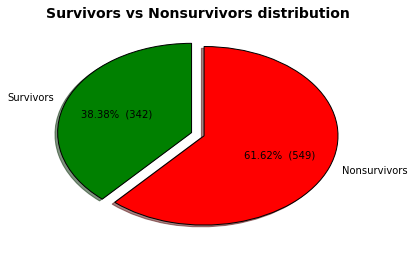

In [29]:
survivors = titanic_df_final[titanic_df_final['Survived'] == 1]
nonsurvivors = titanic_df_final[titanic_df_final['Survived'] == 0]

# Creating the pie chart for survivors vs nonsurvivors
pie_title_surv = 'Survivors vs Nonsurvivors distribution'
pielabels_surv = ['Survivors', 'Nonsurvivors']
sizes_surv = [len(survivors), len(nonsurvivors)]
colors_surv = ['green', 'red']
explode_surv = (0.05, 0.05)  
plt.title(pie_title_surv, fontsize=14, fontweight='bold')

'''
Creating a function in order to display both the percent value and the 
original value in the pie chart
'''
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


plt.pie(sizes_surv, labels=pielabels_surv, colors=colors_surv, explode=explode_surv,
        autopct=make_autopct(sizes_surv), shadow=True, startangle=90)

plt.show()

The pie above shows that approximately **62%** or 549 passengers **perished** in the sinking versus approximately **38%** (342 passengers) who managed to **survive**.  

### Had gender a significant effect in survival?<a name="whichgender"></a>

Lets plot some graphs to check if gender can give us insights about survival on the sinking of the Titanic.


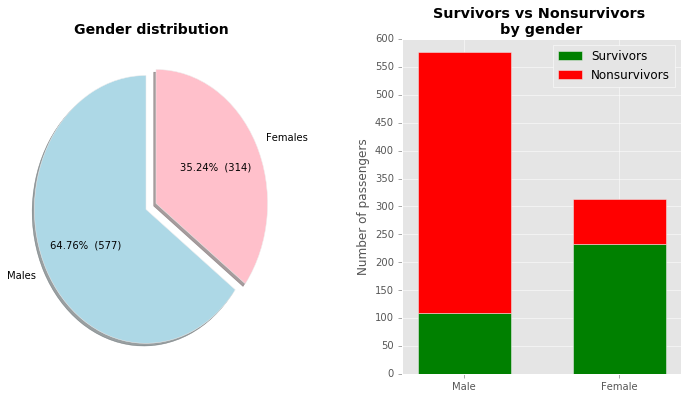

In [30]:
# Plotting our graphs with the ggplot style
plt.style.use('ggplot')

males = titanic_df_final[titanic_df_final.Sex == 'male']
females = titanic_df_final[titanic_df_final.Sex == 'female']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

# Creating the pie chart for the gender distribution of passengers
pie_title_gender = 'Gender distribution'
pielabels_gender = ['Males', 'Females']
sizes_gender = [len(males), len(females)]
colors_gender = ['lightblue', 'pink']
explode_gender = (0.05, 0.05)  
ax1.set_title(pie_title_gender, fontsize=14, fontweight='bold')

ax1.pie(sizes_gender, labels=pielabels_gender, colors=colors_gender, explode=explode_gender,
        autopct=make_autopct(sizes_gender), shadow=True, startangle=90)

# Creating a bar chart that visualizes survivors vs nonsurvivors in each gender
surv_gender = (len(males[males.Survived == 1]), len(females[females.Survived == 1]))
nonsurv_gender = (len(males[males.Survived == 0]), len(females[females.Survived == 0]))
N=2
ind = np.arange(N)
p1 = ax2.bar(ind, surv_gender, color='g', width = 0.6, label='Survivors', align = 'center' )
p2 = ax2.bar(ind, nonsurv_gender, color='r', width = 0.6, bottom=surv_gender, label='Nonsurvivors', align= 'center')
ax2.set_ylabel('Number of passengers')
ax2.set_title('Survivors vs Nonsurvivors \nby gender', fontweight='bold')
ax2.tick_params(axis='x', top='off')
ax2.tick_params(axis='y', right='off')

tick_spacing1 = [0., 1.]
bin_labels1 = ['Male', 'Female']

ax2.set_xticks(tick_spacing1)
ax2.set_xticklabels(bin_labels1)    

ax2.set_yticks(np.arange(0, 650, 50))
ax2.legend(loc='upper right')

plt.show() 

From the above graphs we can notice that:  
* Almost 2/3 of the passengers were male.  
* The large majority of men didn't survive the sinking.  
* Conversely, most women managed to survive.

We can also calculate the percentages of survivors and nonsurvivors:

In [31]:
# Calculating how many men and women survived/perished and creating two dataframes with those results
survival_table_by_gender = pd.crosstab(titanic_df_final['Survived'], titanic_df_final['Sex'])
survival_table_by_gender_df = pd.DataFrame(data=survival_table_by_gender)

'''Creating a new dataframe based on the survival_table_by_gender_df that presents 
the proportion of survivors by Gender'''
survival_table_by_gender_df_perc = pd.DataFrame()
survival_table_by_gender_df_perc['female'] = survival_table_by_gender_df['female']/len(females)*100
survival_table_by_gender_df_perc['male'] = survival_table_by_gender_df['male']/len(males)*100
survival_table_by_gender_df_perc.rename(columns={'female': 'female %', 'male': 'male %'}, inplace=True)

#Merging the above dataframes and adding a row that calculates the sum of each column
final_survival_table_by_gender = pd.concat([survival_table_by_gender_df, survival_table_by_gender_df_perc], axis=1)
sum_row = {col: final_survival_table_by_gender[col].sum() for col in final_survival_table_by_gender}
sum_df = pd.DataFrame(sum_row, index=["Total"])
final_survival_table_by_gender = final_survival_table_by_gender.append(sum_df)
final_survival_table_by_gender.round(1)

,female,female %,male,male %
Survived,,,,
0,81,25.8,468,81.1
1,233,74.2,109,18.9
Total,314,100.0,577,100.0


From the above results it seems that gender was an important factor in the survival of each passenger. Only **18.9% of men survived** compared to **74.2% of women**. To further test this we can use a chi-square test of independence. So our two hypothesis are:

**Ho** : Sex and Survived are independent variables  
**Ha** : Sex and Survived are dependent variables  

We will use 5% significance level.

In [32]:
# importing the relevant statistical module to conduct our chi-square test
from scipy.stats import chi2_contingency

In [33]:
data_for_chi_test = np.array(titanic_df_final.groupby(['Sex','Survived'])['Sex'].count())
data_for_chi_test.resize(2,2)
chi2, p, dof, expected = chi2_contingency(data_for_chi_test)
p

1.1973570627755645e-58

Since the p-value is way less than 5%, we reject the null hypothesis that Sex and Survived are independent variables.

### Was age group a significant factor in survival?<a name="whichage"></a>

As with the gender question we are going to use the aid of data visualisations in order to answer this question. 

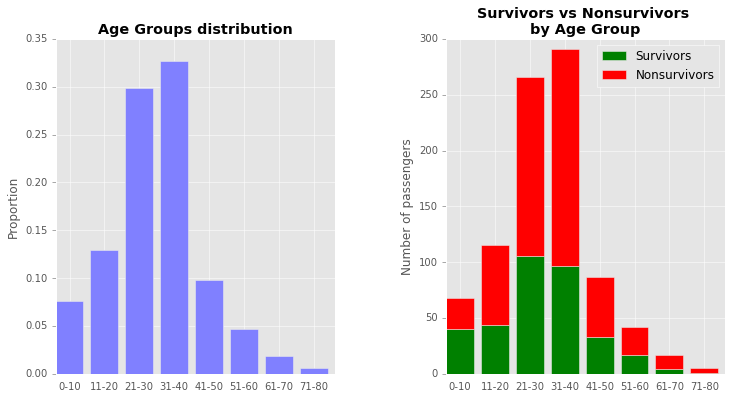

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

# Creating a bar chart that presents age group distribution
age_grouping = titanic_df_final.groupby('AgeGroup').size()/len(titanic_df_final)

ax1.bar(range(len(age_grouping)), age_grouping, color='#8080ff' )
ax1.set_ylabel('Proportion')
ax1.set_title('Age Groups distribution', fontweight='bold')
ax1.tick_params(axis='x', top='off', bottom='off')
ax1.tick_params(axis='y', right='off')

bin_labels2 = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
tick_spacing2 = np.array(range(len(bin_labels2)))+0.4

ax1.set_xticks(tick_spacing2)
ax1.set_xticklabels(bin_labels2)


survivors = titanic_df_final[titanic_df_final['Survived'] == 1]
nonsurvivors = titanic_df_final[titanic_df_final['Survived'] == 0]

# Grouping the survivors/nonsurvivors by age group and transforming the groupby item to a DataFrame 
surv_age = survivors.groupby('AgeGroup').size().reset_index()
nonsurv_age = nonsurvivors.groupby('AgeGroup').size().reset_index()

# Plotting the 2nd bar chart which presents survivors/nonsurvivors by age group
ax2.bar(range(len(surv_age[0])), surv_age[0], label='Survivors', color='g') 
ax2.bar(range(len(nonsurv_age[0])), nonsurv_age[0], bottom=surv_age[0], \
        label='Nonsurvivors', color='r')
ax2.set_ylabel('Number of passengers')
ax2.set_title('Survivors vs Nonsurvivors \nby Age Group', fontweight='bold')
ax2.tick_params(axis='x', top='off', bottom='off')
ax2.tick_params(axis='y', right='off')
ax2.set_xticks(tick_spacing2)
ax2.set_xticklabels(bin_labels2)
ax2.legend(loc='upper right')

plt.show()

Most passengers belonged to the 21-30 and 31-40 age categories as we can see from the first bar chart. From the second bar chart we can notice that only the children in the age category 0-10 had a higher chance of surviving than dying in the shipwreck. In all the other age categories it is clear that the survival rate was below 50% because the red part of each bar is larger than the green part. We can confirm this by the following code: 

In [35]:
survival_per_age_group = titanic_df_final.groupby('AgeGroup')['Survived'].mean()*100
survival_per_age_group.round(1)

AgeGroup
0-10     58.8
11-20    38.3
21-30    39.8
31-40    33.3
41-50    37.9
51-60    40.5
61-70    23.5
71-80    20.0
Name: Survived, dtype: float64

As expected the age group 0-10 had the highest survival rate (58.8%) and the only one that was above 50%. It is also visible that passengers of the age categories 60+ had the least chances to survive. For the other age categories the range of the survival rate varied in a relatively tight range (33.3% to 40.5%).  
Knowning from the [previous question](#whichgender) the gender effect in survival, it is prudent to analyse the survival rate by gender for each age category and check if the above results still stand if we add the gender variable in our analysis.

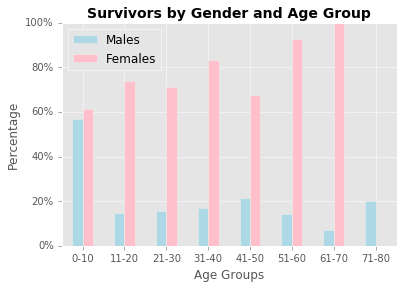

In [36]:
survival_per_age_group_males = males.groupby('AgeGroup').Survived.mean()
survival_per_age_group_females = females.groupby('AgeGroup').Survived.mean()
survival_per_age_group_per_sex = pd.concat([survival_per_age_group_males, survival_per_age_group_females ], axis=1)

# Creating the plot that will show survival % per age group and gender
ax = survival_per_age_group_per_sex.plot(kind='bar', color=['lightblue', 'pink'])
ax.set_title("Survivors by Gender and Age Group", fontsize=14, fontweight='bold')
ax.set_xlabel("Age Groups")
ax.set_ylabel("Percentage")
ax.tick_params(axis='x', top='off')
ax.tick_params(axis='y', right='off')
plt.legend(['Males','Females'], loc= 'upper left')
plt.xticks(rotation='horizontal')             
               
# Importing the relevant fuction to format the y axis 
from matplotlib.ticker import FuncFormatter

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

This graph shows that women irrespectively of age group had a chance of survival of more than 60%. Also the above graph reveals that men had few chances of survival in all age groups except in the age group 0-10 where their survival rate was above 50% and way above their average. The fact that men were almost twice as much as women (577 vs 314) influenced the survival rates of the whole dataset. So splitting the data and visualising the results for men vs women was more than necessary. As for the answer in the question we can't really say that age group had a significant effect in survival by looking at the above graph. We can't spot any clear pattern, but without doubt we can say that **the survival rate for male children 0-10 years old was way higher than the survival rate of other males**.

### Had people who travelled alone or people who travelled with family more chances to survive?<a name="hadpeople"></a>

Lets explore the above question. Using the code below we can draw relevant bar charts to visualize our data once again.

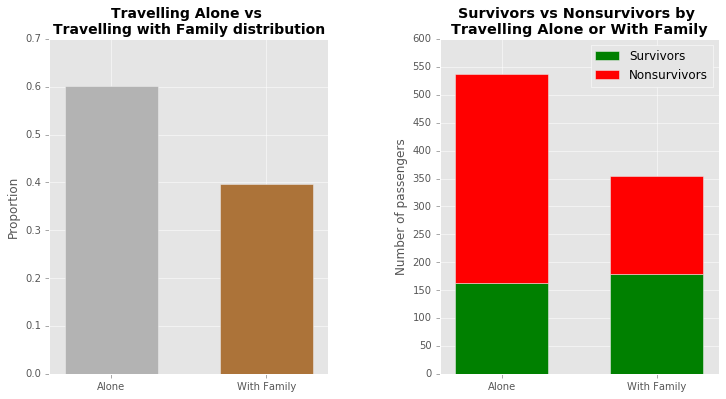

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)


# Creating a bar chart that presents the distribution of passengers travelling alone and travelling with familly
family_trav = titanic_df_final.groupby(['Family']).size()/len(titanic_df_final)

ax1.bar(range(len(family_trav)), family_trav, color=['#b3b3b3','#ac7339'], align = 'center', width=0.6)
ax1.set_title('Travelling Alone vs \nTravelling with Family distribution', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', top='off')
ax1.tick_params(axis='y', right='off')
ax1.set_ylabel('Proportion')

tick_spacing3 = [0., 1.]
bin_labels3 = ['Alone', 'With Family']

ax1.set_xticks(tick_spacing3)
ax1.set_xticklabels(bin_labels3)


'''
Grouping the survivors/nonsurvivors by the condition of travelling alone or with family and 
transforming the groupby item to a DataFrame 
'''
surv_fam = survivors.groupby('Family').size().reset_index()
nonsurv_fam = nonsurvivors.groupby('Family').size().reset_index()

# Plotting the 2nd bar chart which presents survivors/nonsurvivors by travelling alone and travelling with familly
N=2
ind = np.arange(N)
p1 = ax2.bar(ind, surv_fam[0], color='g', width = 0.6, label='Survivors', align = 'center' )
p2 = ax2.bar(ind, nonsurv_fam[0], color='r', width = 0.6, bottom=surv_fam[0], label='Nonsurvivors', align = 'center')
ax2.set_ylabel('Number of passengers')
ax2.set_title('Survivors vs Nonsurvivors by \nTravelling Alone or With Family', fontweight='bold')
ax2.tick_params(axis='x', top='off')
ax2.tick_params(axis='y', right='off')
ax2.set_xticks(tick_spacing3)
ax2.set_xticklabels(bin_labels3)
ax2.set_yticks(np.arange(0, 650, 50))
ax2.legend(loc='upper right')

plt.show() 

60% of passengers were travelling alone versus 40% that were travelling with family. By looking at the second graph it seems that travelling with family had a positive effect on survival. We will split the data once more by gender because this may reveal additional insights about our dataset. 

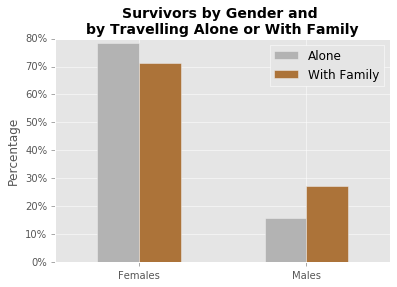

In [38]:
alone = titanic_df_final[titanic_df_final.Family == 0]
with_family = titanic_df_final[titanic_df_final.Family == 1]

survival_alone_by_gender = alone.groupby('Sex').Survived.mean()
survival_with_family_by_gender = with_family.groupby('Sex').Survived.mean()
survival__trav_alone_or_withfam_by_gender = pd.concat([survival_alone_by_gender, survival_with_family_by_gender], axis=1)

# Creating the plot that will show survival rate per gender and per travelling alone or with family
ax = survival__trav_alone_or_withfam_by_gender.plot(kind='bar', color=['#b3b3b3', '#ac7339'])
ax.set_title("Survivors by Gender and \nby Travelling Alone or With Family", fontsize=14, fontweight='bold')
ax.set_ylabel("Percentage")
ax.set_xlabel("")
ax.set_xticklabels(['Females', 'Males'])
ax.tick_params(axis='x', top='off')
ax.tick_params(axis='y', right='off')
plt.legend(['Alone','With Family'], loc= 'upper right')
plt.xticks(rotation='horizontal')             
               
#Importing the relevant module to format the y axis 
from matplotlib.ticker import FuncFormatter

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

The above graph reveals that males travelling with family had more chances of survival than those travelling alone. The reverse relationship can be seen for females but to a much smaller extent. So by calculating the exact survival rate percentages for males... 

In [39]:
male_trav_survival = males.groupby('Family')['Survived'].mean()*100
male_trav_survival.round(1)

Family
0    15.6
1    27.1
Name: Survived, dtype: float64

...we get 15.6% for those who travelled alone versus 27.1% for those with familly. To put these numbers into context this is a difference of:

In [40]:
diff_trav_males = (male_trav_survival[1] - male_trav_survival[0])/male_trav_survival[0]*100
diff_trav_males.round()

74.0

....**74%** so we can conclude that **men travelling with family had more chances to survive than men travelling alone**. But despite this fact their survival rate was quite low compared to the survival rate of women. 

### Which class had the most chances to survive?<a name="wasclass"></a>

Let's turn into the final question of this project. As a reminder class was a proxy for socioeconomic status.

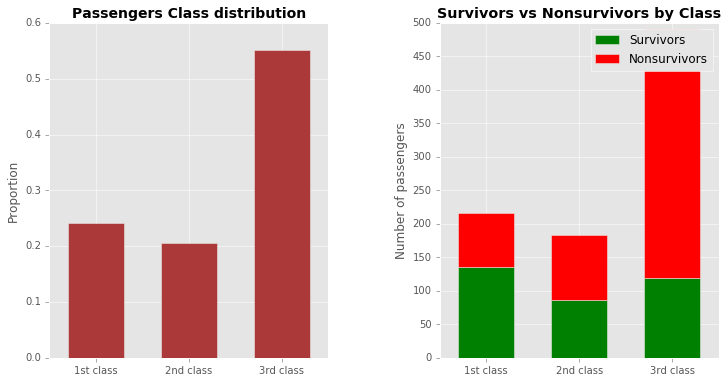

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

# Creating a bar chart that presents the distribution of passengers by class
class_trav = titanic_df_final.groupby(['Pclass']).size()/len(titanic_df_final)

ax1.bar(range(len(class_trav)), class_trav, color='#ac3939', align = 'center', width = 0.6)
ax1.set_title('Passengers Class distribution', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', top='off')
ax1.tick_params(axis='y', right='off')
ax1.set_ylabel('Proportion')

tick_spacing4 = [0., 1., 2.]
bin_labels4 = ['1st class', '2nd class', '3rd class']

ax1.set_xticks(tick_spacing4)
ax1.set_xticklabels(bin_labels4)


# Grouping the survivors/nonsurvivors by class and transforming the groupby item to a DataFrame 
surv_class = survivors.groupby('Pclass').size().reset_index()
nonsurv_class = nonsurvivors.groupby('Pclass').size().reset_index()

# Plotting the 2nd bar chart which presents survivors/nonsurvivors by class
N=3
ind = np.arange(N)
p1 = ax2.bar(ind, surv_class[0], color='g', width = 0.6, label='Survivors', align = 'center' )
p2 = ax2.bar(ind, nonsurv_class[0], color='r', width = 0.6, bottom=surv_class[0], label='Nonsurvivors', align = 'center')
ax2.set_ylabel('Number of passengers')
ax2.set_title('Survivors vs Nonsurvivors by Class', fontweight='bold')
ax2.tick_params(axis='x', top='off')
ax2.tick_params(axis='y', right='off')
ax2.set_xticks(tick_spacing4)
ax2.set_xticklabels(bin_labels4)
ax2.set_yticks(np.arange(0, 550, 50))
ax2.legend(loc='upper right')

plt.show() 

From the first bar chart it can be seen that most passengers were travelling in the 3rd class. Just by visualizing the second bar chart it is apparent that people in this class had not only the most victims (which is natural because it was the most populated class by far) but also had the lowest percentage of survival. Lets be more specific and calculate the percentage of survival in each class: 

In [42]:
surv_rate_by_class = titanic_df_final.groupby('Pclass')['Survived'].mean()*100
surv_rate_by_class.round(1)

Pclass
1    63.0
2    47.3
3    24.2
Name: Survived, dtype: float64

The above results show that the first class passengers had the highest survival rate which was 63% followed by the second class passengers which had a survival rate of 47.3%. For the third class passengers more than 3/4 perished (24.2% survival rate). So it seems that there was a big difference between the survival rates of 1st vs 3rd class and 2nd vs 3rd class. Lets analyse our data a little bit further by adding gender in our analysis:  

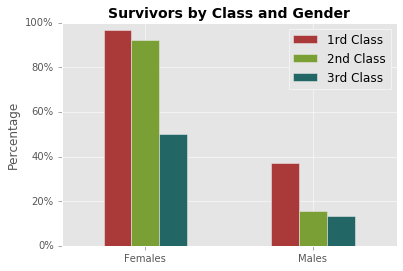

In [43]:
first_class = titanic_df_final[titanic_df_final.Pclass == 1]
second_class = titanic_df_final[titanic_df_final.Pclass == 2]
third_class = titanic_df_final[titanic_df_final.Pclass == 3]


first_class_surv_by_gender = first_class.groupby('Sex').Survived.mean()
second_class_surv_by_gender = second_class.groupby('Sex').Survived.mean()
third_class_surv_by_gender = third_class.groupby('Sex').Survived.mean()

survival_by_class_and_gender = pd.concat([first_class_surv_by_gender,second_class_surv_by_gender, third_class_surv_by_gender], axis=1)

# Creating the plot that will show survival rate per gender and per class
ax = survival_by_class_and_gender.plot(kind='bar', color=['#aa3939', '#7A9F35', '#226666'])
ax.set_title("Survivors by Class and Gender", fontsize=14, fontweight='bold')
ax.set_ylabel("Percentage")
ax.set_xlabel("")
ax.set_xticklabels(['Females', 'Males'])
ax.tick_params(axis='x', top='off')
ax.tick_params(axis='y', right='off')
plt.legend(['1rd Class','2nd Class', '3rd Class'], loc= 'upper right')
plt.xticks(rotation='horizontal')             
               
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

The above bar chart confirms what we have observed before. For both men and women **the survival rate for 1st class passengers was much more higher compared with the survival rate of 3rd class passengers. The same applies for the second class vs third class passengers but only for women**.   

## Conclusions Phase<a name="conclusionsphase"></a>

With this project we managed to extract several interesting insights about the Titanic shipwreck. To sum up:   

**1) 62% of passengers perished in the sinking.**

In the wikipedia [article](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) about the sinking of the Titanic we are informed that: "In the aftermath of the sinking, public inquiries were set up in Britain and the United States....They reached broadly similar conclusions: the regulations on the number of lifeboats that ships had to carry were out of date and inadequate;..... the lifeboats had not been properly filled or crewed...". 

**2) Gender had a significant role in the survival of each passenger. Only 18.9% of men survived compared to 74.2% of women.**  
**3) The male age group 0-10 had more chances to survive than the other males.**   

In another wikipedia [article](https://en.wikipedia.org/wiki/Women_and_children_first) we are informed that 'Women and children first' code of conduct was followed during the sinking of the Titanic. By this code of conduct the lives of women and children are to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats are limited. 


**4) It seems that males travelling with family had more chances to survive than males travelling alone.**   

The total capacity of lifeboats was more than enough for all women and childen onboard the Titanic, see [here](http://www.anesi.com/titanic.htm). So it seems logical to assume that the vacant seats in the lifeboats were filled by the fathers of children and husbands of wifes that were saved instead of being filled by men travelling alone. 

**5) 1st class passengers had higher chances of surviving compared to 3rd class passengers. The same applies for 2nd class women vs 3rd class.**   

Once again quoting the wikipedia [article](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) we are informed that: "Few third-class (steerage) passengers had made it up onto the deck, and most were still lost in the maze of corridors or trapped behind barriers and partitions that segregated the accommodation for the steerage passengers from the first- and second-class areas......A long and winding route had to be taken to reach topside; the steerage-class accommodation, located on C through G decks, was at the extreme ends of the decks, and so was the farthest away from the lifeboats. By contrast, the first-class accommodation was located on the upper decks and so was nearest. Proximity to the lifeboats thus became a key factor in determining who got into them. To add to the difficulty, many of the steerage passengers did not understand or speak English." 


### Limitations of the project

Despite having checked the validity of our conclusions with external sources, this is not always feasible in similar projects. Titanic shipwreck is the most infamous maritime accident of the 20th century and is documented in films, books and analysed extensively, that's why we could confirm our findings.  

As we conclude our project we need to clarify a few things about our analysis. First of all we had a lot of missing values in the variables Age and Cabin. We entirely dropped the Cabin variable which may have been used in the analysis in order to locate where each passenger was during the sinking and determine if cabin location was significant in survival. Also 20% of the Age variable values were missing and we had to fill these values by creating the variable Title. We also dropped the variables PassengerId, Name, Ticket and we didn't use the variable Embarked in our analysis. Finally, we should not forget that our dataset was a sample of the actual Titanic population. In any case, all those limitations must be taken into consideration when someone explores the findings of this project.   
 

### References

**1)** https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic  
**2)** https://www.kaggle.com/c/titanic  
**3)** Python Software Foundation. Python Language Reference, version 2.7. Available at http://www.python.org  
**4)** Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), http://scitation.aip.org/content/aip/journal/cise/13/2/10.1109/MCSE.2011.37  
**5)** Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010)http://conference.scipy.org/proceedings/scipy2010/mckinney.html  
**6)** John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55  
**7)** Jones E, Oliphant E, Peterson P, et al. SciPy: Open Source Scientific Tools for Python, 2001-, http://www.scipy.org/   
**8)** https://en.wikipedia.org/wiki/Women_and_children_first  
**9)** http://www.anesi.com/titanic.htm